In [1]:
from time import sleep
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import xlwings as xw

In [2]:
# リアルタイムオッズEX_Pro に接続
wb = xw.Book('リアルタイムオッズEX_Pro_ver1.0.0.xlsm')

In [3]:
# 単勝・複勝シート に接続
sheet = wb.sheets['単勝・複勝']

#### 出走馬情報を取得する

In [4]:
# 項目名を取得
colnames = sheet.range('A13:N13').value
print(colnames)

['枠', '馬番', '馬名', '単勝\nオッズ', '単勝\n人気', '複勝オッズ', None, None, '複勝\n人気', '性齢', '馬体重', '負担重量', '騎手名', '調教師名']


In [5]:
# 表内のデータを取得
data = sheet.range('A14:N31').value
print(data[:2])

[[1.0, 1.0, 'メイプルレモン', 50.4, 8.0, 5.9, '-', 10.2, 8.0, '牝2', '', 54.0, '丸田恭介', '南田美知'], [2.0, 2.0, 'ラズベリームース', 2.6, 1.0, 1.3, '-', 1.8, 2.0, '牝2', '', 54.0, 'ルメール', '林徹']]


In [6]:
# データフレーム化
tansyo_df = pd.DataFrame(data, columns=colnames)
tansyo_df

,枠,馬番,馬名,単勝\nオッズ,単勝\n人気,複勝オッズ,NaN,NaN,複勝\n人気,性齢,馬体重,負担重量,騎手名,調教師名
0,1.0,1.0,メイプルレモン,50.4,8.0,5.9,-,10.2,8.0,牝2,,54.0,丸田恭介,南田美知
1,2.0,2.0,ラズベリームース,2.6,1.0,1.3,-,1.8,2.0,牝2,,54.0,ルメール,林徹
2,2.0,3.0,アークヴィクトリア,85.2,9.0,9.1,-,15.9,10.0,牝2,,54.0,柴田善臣,本間忍
3,3.0,4.0,スターオブフェイス,129.7,11.0,22.9,-,40.6,14.0,牡2,,51.0,永野猛蔵,土田稔
4,3.0,5.0,ホウオウパレード,3.2,2.0,1.2,-,1.6,1.0,牡2,,54.0,石橋脩,池上昌和
5,4.0,6.0,アストラガルス,153.6,14.0,17.5,-,31.1,12.0,牡2,,54.0,大庭和弥,松永康利
6,4.0,7.0,ウルオイ,102.6,10.0,8.6,-,15.1,9.0,牝2,,54.0,岩部純二,加藤和宏
7,5.0,8.0,ケイアイユニバース,20.0,5.0,3.1,-,5.1,6.0,牡2,,54.0,内田博幸,上原博之
8,5.0,9.0,アイラジオーネ,145.2,13.0,18.9,-,33.6,13.0,牝2,,54.0,丸山元気,田中剛
9,6.0,10.0,ダイゴシンリュウ,26.8,7.0,3.2,-,5.4,7.0,牡2,,54.0,田辺裕信,堀井雅広


#### 単勝オッズの時系列データを取得

In [7]:
# 馬名を取得
bamei = sheet.range('C14:C31').value
print(bamei)

['メイプルレモン', 'ラズベリームース', 'アークヴィクトリア', 'スターオブフェイス', 'ホウオウパレード', 'アストラガルス', 'ウルオイ', 'ケイアイユニバース', 'アイラジオーネ', 'ダイゴシンリュウ', 'サトノストロング', 'ネイチャーバラン', 'ダイメイミライ', 'ブエノスアン', 'ハッピープリベイル', '', '', '']


In [8]:
# 時系列単勝オッズを格納するリスト
tansyo_odds_all = list()

# 更新ステータスを更新中で初期化
update_status = '更新中'

# 更新間隔を取得
update_interval = sheet.range('E3').value

# 更新ステータスが更新中になっている間はデータを取得し続ける
# オッズが確定するか、更新停止ボタンを押すと処理が終了する
while update_status == '更新中':
    # 取得した更新間隔でデータを取得
    sleep(sheet.range('E3').value)

    # 最新の更新ステータスを取得
    update_status = sheet.range('I3').value

    # 最新の単勝オッズを取得
    tansyo_odds = [datetime.datetime.now()] + sheet.range('D14:D31').value

    # 最新の単勝オッズを時系列単勝オッズ用リストに append する
    tansyo_odds_all.append(tansyo_odds)

In [9]:
# 時系列単勝オッズの内用を確認
print(tansyo_odds_all[:2])

[[datetime.datetime(2021, 8, 28, 9, 38, 0, 980307), 50.4, 2.6, 85.2, 129.7, 3.2, 153.6, 102.6, 20.0, 145.2, 26.8, 5.9, 138.0, 20.9, 219.7, 7.3, '', '', ''], [datetime.datetime(2021, 8, 28, 9, 38, 30, 995901), 50.4, 2.6, 85.2, 129.7, 3.2, 153.6, 102.6, 20.0, 145.2, 26.8, 5.9, 138.0, 20.9, 219.7, 7.3, '', '', '']]


In [10]:
# 時系列単勝オッズをデータフレーム化
tansyo_odds_all_df = pd.DataFrame(tansyo_odds_all, columns=['time'] + bamei).set_index('time')
tansyo_odds_all_df.head()

,メイプルレモン,ラズベリームース,アークヴィクトリア,スターオブフェイス,ホウオウパレード,アストラガルス,ウルオイ,ケイアイユニバース,アイラジオーネ,ダイゴシンリュウ,サトノストロング,ネイチャーバラン,ダイメイミライ,ブエノスアン,ハッピープリベイル,,,
time,,,,,,,,,,,,,,,,,,
2021-08-28 09:38:00.980307,50.4,2.6,85.2,129.7,3.2,153.6,102.6,20.0,145.2,26.8,5.9,138.0,20.9,219.7,7.3,,,
2021-08-28 09:38:30.995901,50.4,2.6,85.2,129.7,3.2,153.6,102.6,20.0,145.2,26.8,5.9,138.0,20.9,219.7,7.3,,,
2021-08-28 09:39:01.025220,51.0,2.6,86.5,132.1,3.2,155.9,104.0,20.4,147.6,27.2,5.9,139.4,20.7,221.4,7.4,,,
2021-08-28 09:39:31.040508,51.0,2.6,86.5,132.1,3.2,155.9,104.0,20.4,147.6,27.2,5.9,139.4,20.7,221.4,7.4,,,
2021-08-28 09:40:01.054914,51.0,2.6,86.5,132.1,3.2,155.9,104.0,20.4,147.6,27.2,5.9,139.4,20.7,221.4,7.4,,,


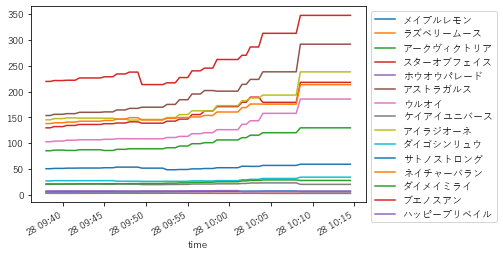

In [11]:
# 時系列単勝オッズを折れ線グラフで描画
tansyo_odds_all_df.plot()
plt.legend(bbox_to_anchor=(1, 1));

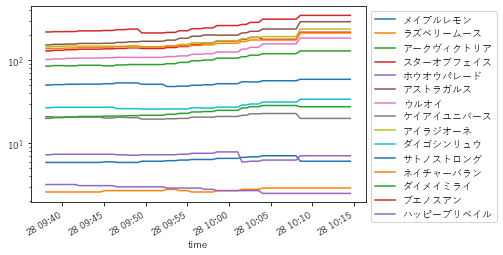

In [12]:
# 縦軸に対数をとり時系列単勝オッズを折れ線グラフで描画
tansyo_odds_all_df.plot(logy=True)
plt.legend(bbox_to_anchor=(1, 1));